Attempt to build the a network similar to the AlexNet architecture and train it on the CIFAR10 dataset. We will resize the number of kernels used per layer to speeds up training and/or preserves accuracy. 




In [ ]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import time

# Set random state
np.random.seed(42)

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


Text(0.5, 1.0, 'Class: [6]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'Class: [9]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'Class: [9]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'Class: [4]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'Class: [1]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'Class: [1]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'Class: [2]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'Class: [7]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

Text(0.5, 1.0, 'Class: [8]')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

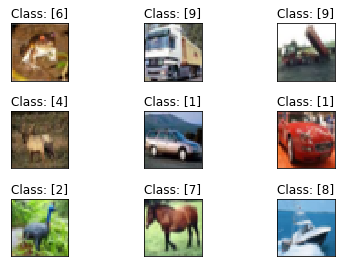

In [ ]:
fig = plt.figure()

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.tight_layout()
  plt.imshow(X_train_full[i], interpolation='none')
  plt.title('Class: {}'.format(y_train_full[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
X_train_full.shape

(50000, 32, 32, 3)

In [ ]:
# Quick data explortion
print('Dimension of one sample',X_train_full[1].shape)
print('Dimensions of X_test',X_test.shape)
print('Dimensions of X_train',X_train_full.shape)


Dimension of one sample (32, 32, 3)
Dimensions of X_test (10000, 32, 32, 3)
Dimensions of X_train (50000, 32, 32, 3)


We see that the input/image size is 32x32x3. The actual layout of the AlexNet architecture is as below:

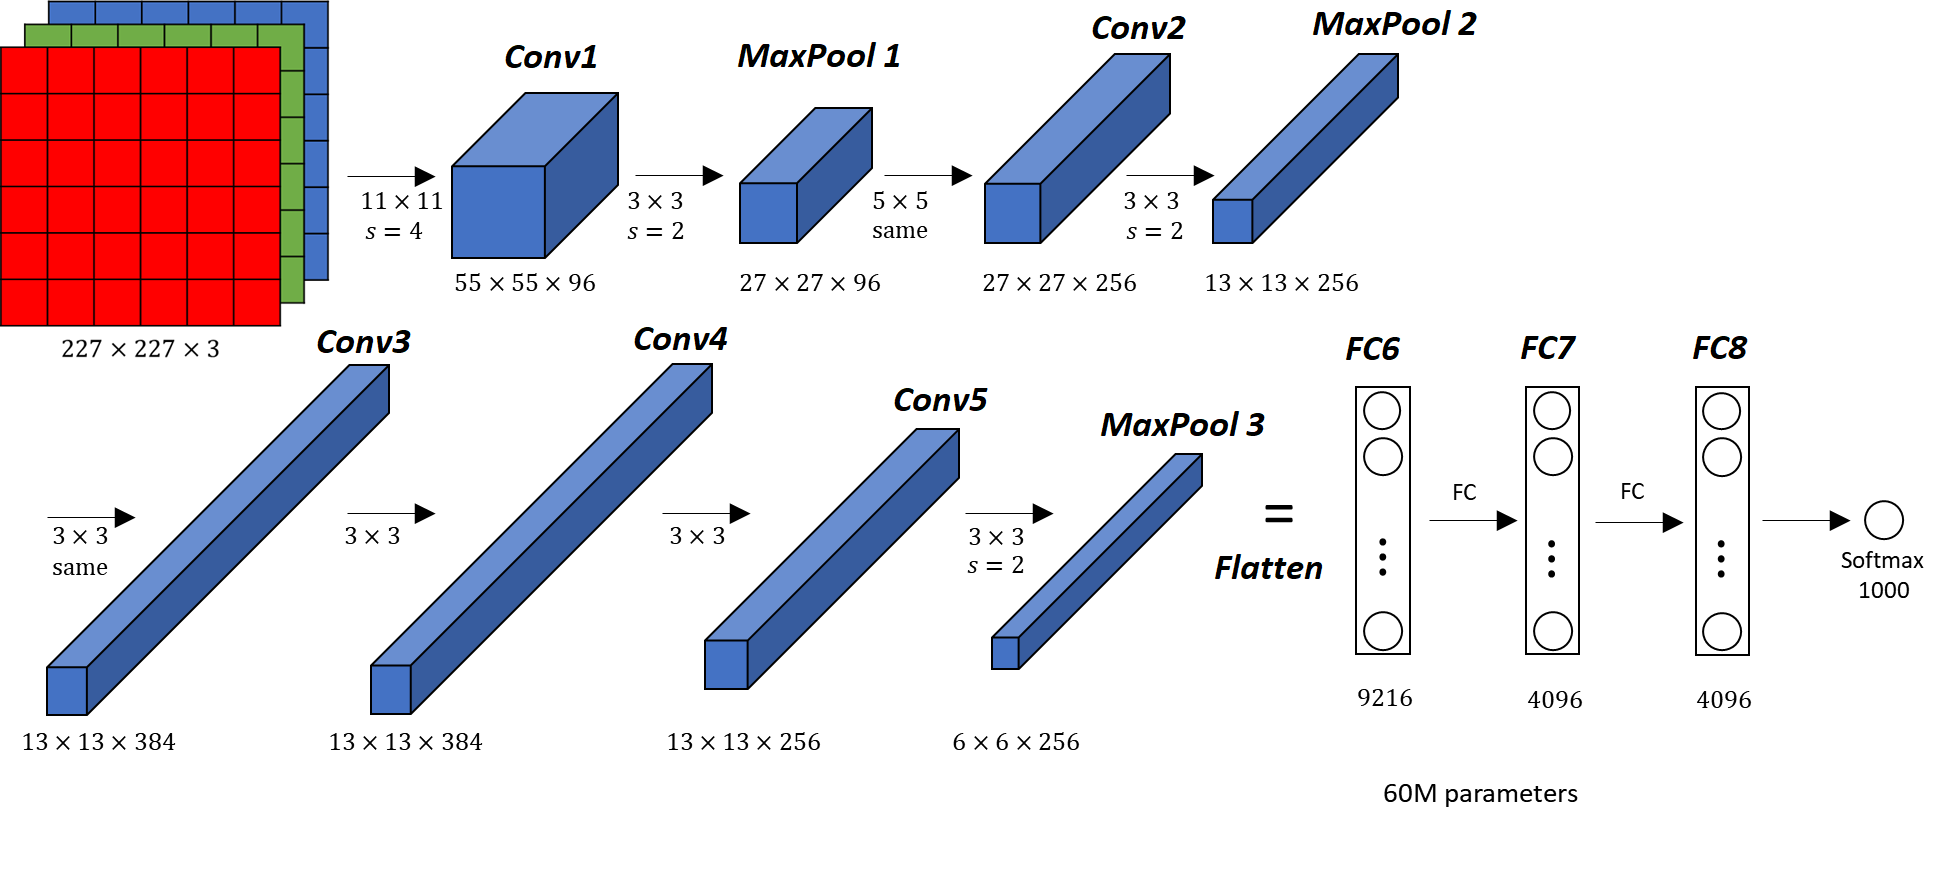

In [ ]:
# tools to help debug as we go

def calc_output_dimension(n, f, s, p = 0):
  # calculate the output dimension for a sample
  # n = input dimension size
  # f = filter size
  # s = stride size
  # p = padding
  # do not cast result, we need to see if it is a whole number or not. it should be a whole number
  return ((n+(2*p) - f)/s) +1

def print_layer_dim(layer, dim, n_filters):
  print(layer+' layer size : ' + str(dim) +' x '+ str(dim) + ' x ' +str(n_filters) )


In [ ]:
# Start Model
keras.backend.clear_session()

inputs = keras.Input(shape = (32,32,3), name = 'input_CIFAR10')

cnn_dropout_rate = 0.15

# First Convolutional Layer
# AlexNet parameters: f = 5, s = 2, 96 filters, valid padding

n_filt_c1 = 96
f_size_c1 = (5,5)
strides_c1 = (2,2)
name_c1 = 'conv_1'
#dim_c1 = calc_output_dimension(32, f_size_c1[0], strides_c1[0]) # debug
#print_layer_dim(name_c1, dim_c1, n_filt_c1)  # debug

x = layers.Conv2D(filters=n_filt_c1, kernel_size = f_size_c1,activation='relu', strides = strides_c1, input_shape = (32,32,3), padding = 'valid', name = name_c1)(inputs)
x = layers.BatchNormalization()(x)

# First Max Pooling layer - As per instructions from Mehdi avoid this layer as we already lack data
# AlexNet parameters: f = 3x3, s = 2, valid padding
# f_size_p1 = (2,2) #strides_p1 = (1,1) #name_p1 = 'maxpool_1' 
# x = layers.MaxPool2D(pool_size=f_size_p1, strides = strides_p1, padding = 'valid', name = name_p1)(x)

# Second Convolutional Layer
# AlexNet parameters: f = 5, s = 1, 256 filters, same padding
n_filt_c2 = 256
f_size_c2 = (3,3)
strides_c2 = (1,1)
name_c2 = 'conv_2'
x = layers.Conv2D(filters=n_filt_c2, kernel_size = f_size_c2,activation='relu', strides = strides_c2, padding = 'same', name = name_c2)(x)
x = layers.BatchNormalization()(x)

# Second Max Pooling layer
# AlexNet parameters: f = 3x3, s = 2
f_size_p2 = (2,2)
strides_p2 = (1,1)
name_p2 = 'maxpool_2'
x = layers.MaxPool2D(pool_size=f_size_p2, strides = strides_p2, padding = 'valid', name = name_p2)(x)
x = layers.Dropout(cnn_dropout_rate)(x)


# Third Convoultional Layer
# AlexNet parameters: f = 3x3, s = 1, 384 filters, same padding
n_filt_c3 = 384
f_size_c3 = (2,2)
strides_c3 = (1,1)
name_c3 = 'conv_3'
x = layers.Conv2D(filters=n_filt_c3, kernel_size = f_size_c3,activation='relu', strides = strides_c3, padding = 'same', name = name_c3)(x)
x = layers.BatchNormalization()(x)

# Fourth Convoultional Layer
# AlexNet parameters same as layer 3
n_filt_c4 = 384
f_size_c4 = (2,2)
strides_c4 = (1,1)
name_c4 = 'conv_4'
x = layers.Conv2D(filters=n_filt_c4, kernel_size = f_size_c4, strides = strides_c4, padding = 'same', name = name_c4)(x)
x = layers.BatchNormalization()(x)

# Fifth Convoultional Layer
# AlexNet parameters: f = 3x3, s = 1, 256 filters
n_filt_c5 = 256
f_size_c5 = (2,2)
strides_c5 = (1,1)
name_c5 = 'conv_5'
x = layers.Conv2D(filters=n_filt_c5, kernel_size = f_size_c5,activation ='relu', strides = strides_c5, padding = 'same', name = name_c5)(x)
x = layers.BatchNormalization()(x)

# Third Max Pooling layer
# AlexNet parameters: f = 3x3, s = 2
# At this point we are going to stick with a small size of 2x2 since our dimenions are pretty low
f_size_p3 = (2,2)
strides_p3 = (2,2)
name_p3 = 'maxpool_3'
x = layers.MaxPool2D(pool_size=f_size_p3, strides = strides_p3, padding = 'same', name = name_p3)(x)
x = layers.Dropout(cnn_dropout_rate)(x)

In [ ]:
# Dense Layers

dnn_dropout_rate = 0.4

flat = layers.Flatten()(x)

# First Hidden layer
# AlexNet parameters: neurons = 9216
# we need to dropout less here because a high percentage at the top will reduce input info too much
x = layers.Dense(6000, activation = "relu")(flat)
x = layers.Dropout(dnn_dropout_rate-0.2)(x)

# Second Hidden layer
# AlexNet parameters: neurons = 4096
x = layers.Dense(4000, activation = "relu")(x)
x = layers.Dropout(dnn_dropout_rate)(x)

# Third Hidden layer - I keep trying to avoid using this 3rd layer but anything for performance
# AlexNet parameters: neurons = 4096
x = layers.Dense(4000, activation = "relu")(x)
x = layers.Dropout(cnn_dropout_rate)(x)

# Ouput
outputs = layers.Dense(10, activation='softmax')(x)

Model: "CIFAR10_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_CIFAR10 (InputLayer)   [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 14, 14, 96)        7296      
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 96)        384       
_________________________________________________________________
conv_2 (Conv2D)              (None, 14, 14, 256)       221440    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 256)       1024      
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 13, 13, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 256)     

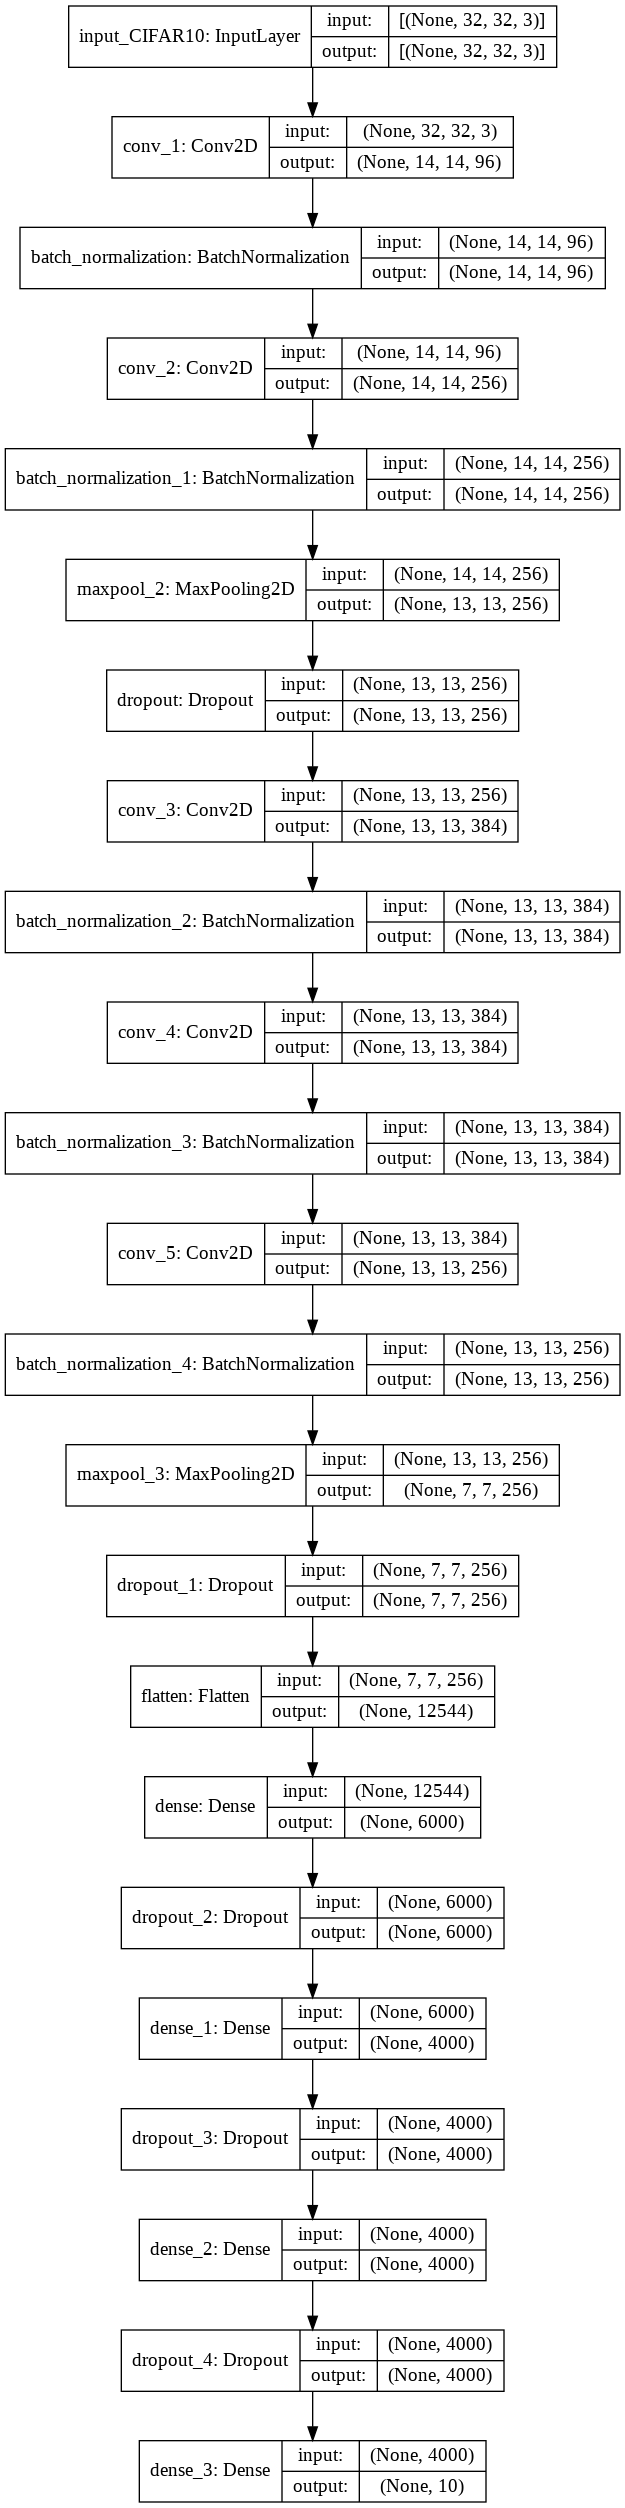

In [ ]:
# Summary
model = keras.Model(inputs = inputs, outputs = outputs, name ='CIFAR10_model')
model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(
    loss = keras.losses.sparse_categorical_crossentropy,
    optimizer  = keras.optimizers.SGD(learning_rate = 0.01, momentum=0.9),
    metrics = ["accuracy"],
)

In [ ]:
# Using the scheduler seems to get better results than without.
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

call_sched = tf.keras.callbacks.LearningRateScheduler(scheduler)  

# patience >= 10 is not a great because it risks running too long and crashing RAM in VM if
# ...we happend to only get marginal increases in accuracy
# but risk it for better accuracy
early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15)

t0 = time.time()
history = model.fit(X_train_full, y_train_full, batch_size=60, epochs = 150, validation_split=0.2,callbacks = [early_stop, call_sched])
t1 = time.time()

print('Runtime (mins)', (t1-t0)/60)

Epoch 1/150
667/667 [==============================] - 78s 68ms/step - loss: 1.6253 - accuracy: 0.4333 - val_loss: 1.6628 - val_accuracy: 0.4240
Epoch 2/150
667/667 [==============================] - 47s 71ms/step - loss: 1.1531 - accuracy: 0.5913 - val_loss: 1.2597 - val_accuracy: 0.5482
Epoch 3/150
667/667 [==============================] - 47s 70ms/step - loss: 0.9122 - accuracy: 0.6795 - val_loss: 0.9800 - val_accuracy: 0.6609
Epoch 4/150
667/667 [==============================] - 47s 71ms/step - loss: 0.7443 - accuracy: 0.7398 - val_loss: 0.8381 - val_accuracy: 0.7050
Epoch 5/150
667/667 [==============================] - 47s 71ms/step - loss: 0.6165 - accuracy: 0.7832 - val_loss: 0.8037 - val_accuracy: 0.7189
Epoch 6/150
667/667 [==============================] - 47s 70ms/step - loss: 0.5024 - accuracy: 0.8221 - val_loss: 0.7370 - val_accuracy: 0.7498
Epoch 7/150
667/667 [==============================] - 47s 71ms/step - loss: 0.3957 - accuracy: 0.8608 - val_loss: 0.7629 - val_ac

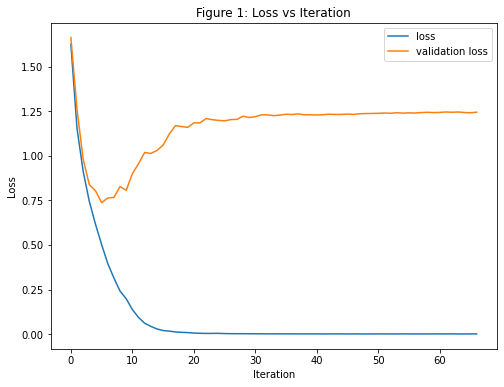

In [ ]:
size = plt.figure(figsize = (8,6))
plt.title('Figure 1: Loss vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend();

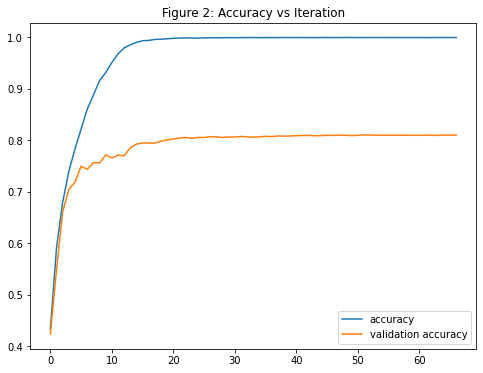

In [ ]:
size = plt.figure(figsize = (8,6))
plt.title('Figure 2: Accuracy vs Iteration')
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend();

In [ ]:
# Test set results
from sklearn.metrics import accuracy_score

# gives the maximum probability for each label by index
test_probs = model.predict(X_test) 

# get the predictions
y_pred = test_probs.argmax(axis=1)

print('Final Test Set Accuracy', accuracy_score(y_test, y_pred) )

Final Test Set Accuracy 0.8034


- Not sure that our final test accuracy of 80.3% is really as good as we can get. While I did use early stopping because we are risking crashing the Colab VM when we run for too long with too many parameters. But maybe there was a more clever way to configure the network with fewer paramters and a better dropout rate to get past 80.3%.
- Because filters in a convolutional layer decrease our dimensions then we risk losing data if the filter is too big. I tried to use the 'SAME' padding to avoid this but overall I am not sure it helped.
- It seems like overall the learning rate scheduler did not help that much. Before applying it we were getting around 78% maximum validation accuracy, so getting only a maximum of 81% validation accuracy does not seem that great. 
- The code will not work without batch normalization. Before applying it the results were only around 10% validation accuracy.

